In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [127]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [128]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

/var/folders/wf/ww6n144500v8w41782xzk3z40000gn/T/ipykernel_37848/1116338469.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'] ,cmap='viridis', s=50)


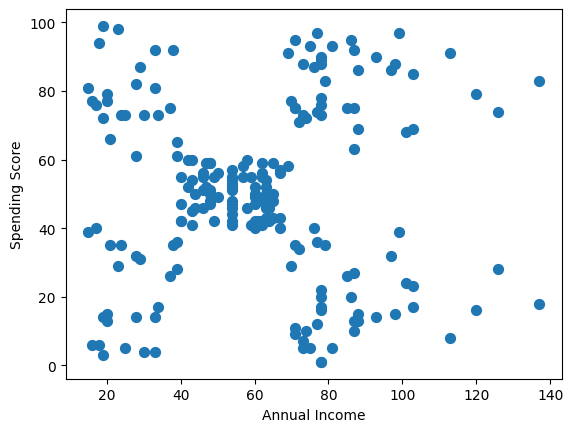

In [129]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'] ,cmap='viridis', s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

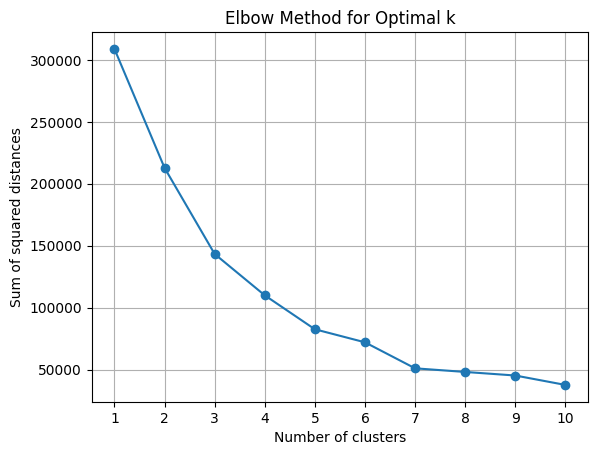

In [130]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)


plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [132]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [134]:
df['cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


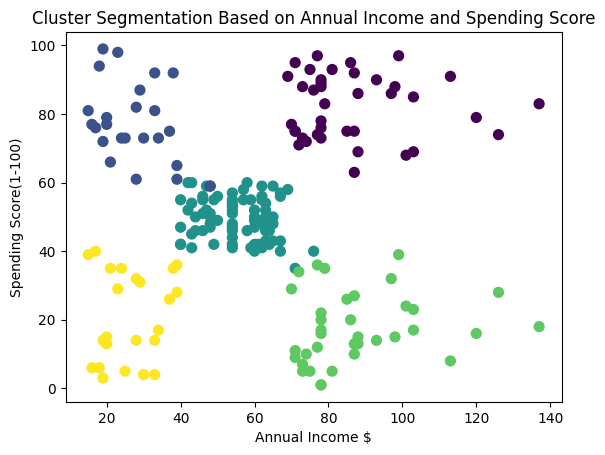

In [135]:
plt.title('Cluster Segmentation Based on Annual Income and Spending Score')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income $')
plt.ylabel('Spending Score(1-100)')
plt.show()
